C:\Users\Shlesh Gholap\AppData\Local\Temp\ipykernel_10036\3403443207.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


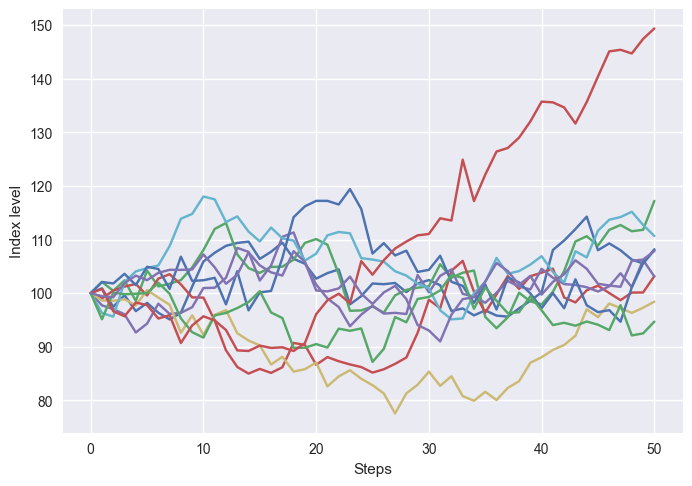

Estimated European call option price: 8.165807966259603


In [1]:
# Monte Carlo valuation of European call options

# Import required libraries
import math
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn')

# Set a random seed for reproducibility
np.random.seed(20000)

# Record the starting time for performance measurement
t0 = time()

# Option parameters
S0 = 100.  # Initial stock price
K = 105.  # Strike price
T = 1.0  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility of the underlying asset

M = 50  # Number of time steps for discretization
dt = T / M  # Time step size
I = 250000  # Number of simulated paths

# Simulating I paths with M time steps using the Black-Scholes formula
# The formula used here is based on the log version of the Black-Scholes equation.
# It employs numpy's vectorized operations to speed up the computation.
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * np.sqrt(dt)
                          * np.random.standard_normal((M + 1, I)), axis=0))

# Ensure the initial stock price is included in the simulation
S[0] = S0

# Calculating the Monte Carlo estimator for the European call option
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

# Results output
tnp2 = time() - t0  # Time taken for the Monte Carlo simulation

# Plot the first 10 simulated paths
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.show()

# Print the estimated option price
print("Estimated European call option price:", C0)


The code above implements the Monte Carlo valuation method for European call options using the Black-Scholes formula. It simulates multiple paths of the underlying stock price using the log version of the Black-Scholes equation and then calculates the option price using the Monte Carlo estimator. Let's add some explanations and comments to the code:

1. Import Libraries: Import the required libraries for mathematical operations, random number generation, and plotting.

2. Set Random Seed: Set a random seed using np.random.seed() to ensure reproducibility of the results.

3. Record Starting Time: Use time() from the time module to record the starting time for performance measurement.

4. Option Parameters: Define the parameters required for the option valuation, such as initial stock price (S0), strike price (K), time to expiration (T), risk-free rate (r), and volatility (sigma).

5. Discretization Parameters: Specify the number of time steps (M) and the time step size (dt) for discretizing the time interval.

6. Number of Simulations: Define the number of simulated paths (I) to be generated for the Monte Carlo simulation.

7. Monte Carlo Simulation: Simulate the paths of the underlying asset using the Black-Scholes formula. The formula uses the numpy function np.cumsum() for cumulative sum and np.random.standard_normal() for generating random numbers from the standard normal distribution.

8. Ensure Initial Stock Price: Set the initial stock price (S0) at the beginning of each path.

9. Monte Carlo Estimator: Calculate the option price using the Monte Carlo estimator. The estimator involves calculating the maximum of the difference between the final stock price and the strike price, and then taking the average over all paths.

10. Results Output: Print the estimated European call option price (C0) and the time taken for the Monte Carlo simulation (tnp2).

11. Plotting: Plot the first 10 simulated paths of the underlying stock price using matplotlib.

#### Additional Examples:
You can experiment with different option parameters to predict option prices for various scenarios. For example:

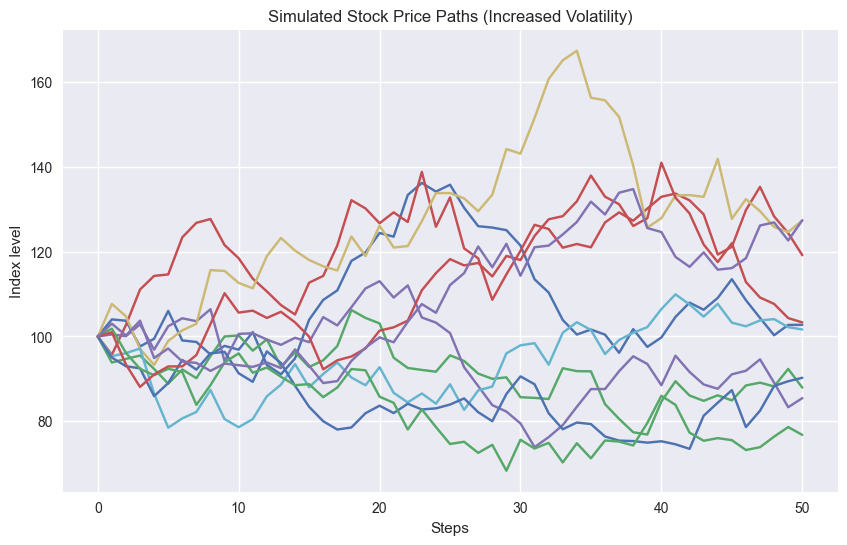

Estimated European call option price (Increased Volatility): 12.221979642642685


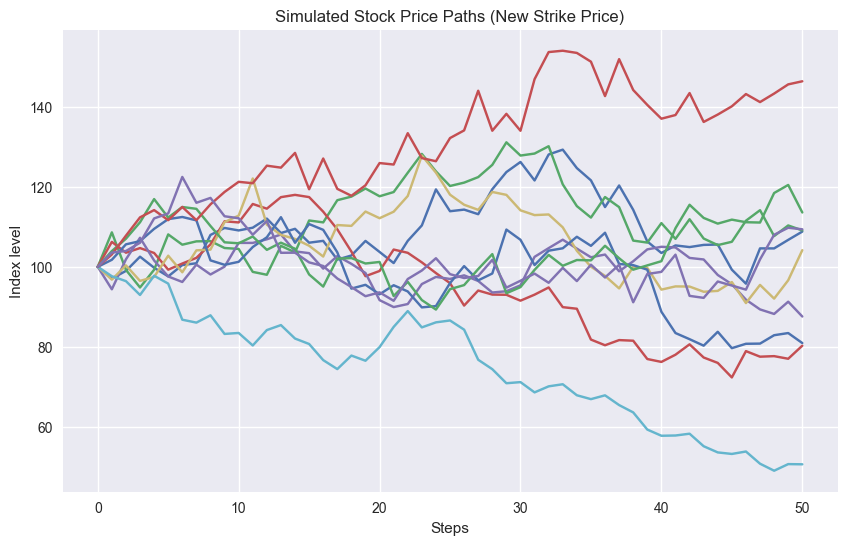

Estimated European call option price (New Strike Price): 10.139568736780419


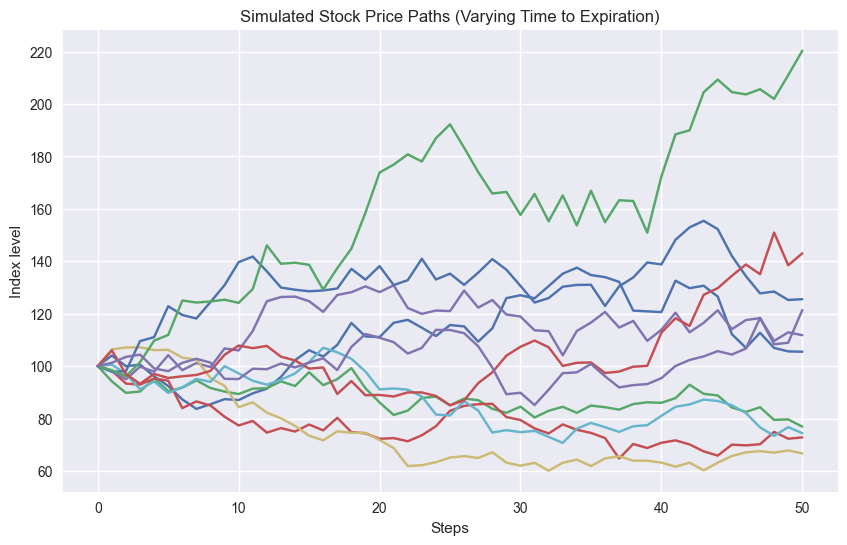

Estimated European call option price (Varying Time to Expiration): 10.450150241345835


In [2]:
# Additional Examples

# Example 1: Increase volatility
sigma = 0.3
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * np.sqrt(dt)
                          * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

# Plot the first 10 simulated paths with increased volatility
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.title('Simulated Stock Price Paths (Increased Volatility)')
plt.show()

print("Estimated European call option price (Increased Volatility):", C0)


# Example 2: Change strike price
K = 110.
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * np.sqrt(dt)
                          * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

# Plot the first 10 simulated paths with the new strike price
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.title('Simulated Stock Price Paths (New Strike Price)')
plt.show()

print("Estimated European call option price (New Strike Price):", C0)


# Example 3: Vary time to expiration
T = 0.5
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * np.sqrt(dt)
                          * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

# Plot the first 10 simulated paths with varying time to expiration
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Index level')
plt.title('Simulated Stock Price Paths (Varying Time to Expiration)')
plt.show()

print("Estimated European call option price (Varying Time to Expiration):", C0)

In the additional examples, we update the option parameters (volatility sigma, strike price K, and time to expiration T) and then recalculate the option price using the same Monte Carlo simulation technique. The code prints the estimated European call option prices for the modified scenarios.
With these updates, the code will generate graphs for the first 10 simulated stock price paths for each of the additional examples. The graphs will help visualize the impact of different option parameters on the stock price paths, and the code will also display the estimated European call option prices for each scenario.